# RNN

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# 파일 
df = pd.read_csv('일별 전처리 데이터.csv',encoding='utf8',parse_dates=['base_date'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55824 entries, 0 to 55823
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   base_date      55824 non-null  datetime64[ns]
 1   location       55824 non-null  object        
 2   area_cnt       50522 non-null  float64       
 3   em_cnt         50522 non-null  float64       
 4   em_g           50522 non-null  float64       
 5   resd_kor       54911 non-null  float64       
 6   work_kor       54911 non-null  float64       
 7   visit_kor      54911 non-null  float64       
 8   resd_lf        54911 non-null  float64       
 9   work_lf        54911 non-null  float64       
 10  visit_lf       54911 non-null  float64       
 11  visit_pop_cnt  54911 non-null  float64       
 12  풍속             54911 non-null  float64       
 13  기온             54911 non-null  float64       
 14  습도             54911 non-null  float64       
 15  강수             5491

,base_date,location,area_cnt,em_cnt,em_g,resd_kor,work_kor,visit_kor,resd_lf,work_lf,visit_lf,visit_pop_cnt,풍속,기온,습도,강수
0,2018-01-01,건입동,32.0,668.0,1708250.0,199.611889,22.270278,213.621737,12.226698,2.179820,13.054703,26.248146,1.616667,5.254167,54.041667,0.0
1,2018-01-01,구좌읍,NaN,NaN,NaN,311.449242,19.475967,280.604967,13.681149,1.372111,6.322790,17.154034,3.404167,4.575000,63.333333,0.0
2,2018-01-01,남원읍,52.0,304.0,1239600.0,329.234019,20.512157,247.501202,16.354599,2.403829,5.165862,20.773841,3.070833,7.212500,51.375000,0.0
3,2018-01-01,노형동,171.0,3903.0,9357900.0,1355.900118,83.139934,491.447266,67.677266,4.825817,17.674662,53.633532,1.641667,5.379167,54.083333,0.0
4,2018-01-01,대륜동,38.0,650.0,1717700.0,306.384283,23.104325,241.575148,8.031951,0.586331,7.365770,10.523813,1.108333,8.287500,53.625000,0.0


In [3]:
# 결측치 확인
df.isnull().sum()

base_date           0
location            0
area_cnt         5302
em_cnt           5302
em_g             5302
resd_kor          913
work_kor          913
visit_kor         913
resd_lf           913
work_lf           913
visit_lf          913
visit_pop_cnt     913
풍속                913
기온                913
습도                913
강수                913
dtype: int64

In [4]:
# 결측치 0 처리
df = df.fillna(0)

In [5]:
df['base_date'] = pd.to_datetime(df['base_date'],format='%Y%m')
df['year'] = df['base_date'].dt.year

In [6]:
# 정규화
scaler = MinMaxScaler()
scale_cols =  df.drop(columns=['base_date','location'], axis=1)
scale_cols[:] = scaler.fit_transform(scale_cols[:])
scale_cols

,area_cnt,em_cnt,em_g,resd_kor,work_kor,visit_kor,resd_lf,work_lf,visit_lf,visit_pop_cnt,풍속,기온,습도,강수,year
0,0.187135,0.096129,0.123399,0.117456,0.071197,0.247152,0.114795,0.123365,0.146728,0.063159,0.081730,0.352841,0.540417,0.03681,0.0
1,0.000000,0.000000,0.000000,0.183264,0.062264,0.324649,0.128451,0.077653,0.071065,0.041276,0.166832,0.336507,0.633333,0.03681,0.0
2,0.304094,0.043747,0.089545,0.193729,0.065576,0.286349,0.153552,0.136043,0.058062,0.049986,0.150962,0.399940,0.513750,0.03681,0.0
3,1.000000,0.561664,0.675990,0.797843,0.265794,0.568586,0.635415,0.273113,0.198654,0.129054,0.082920,0.355847,0.540833,0.03681,0.0
4,0.222222,0.093539,0.124082,0.180284,0.073863,0.279493,0.075411,0.033183,0.082788,0.025323,0.057528,0.425794,0.536250,0.03681,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55819,0.280702,0.053245,0.099503,0.162964,0.087032,0.211643,0.055906,0.045485,0.055686,0.002883,0.125372,0.795170,0.913333,0.03681,1.0
55820,0.415205,0.038711,0.070348,0.114019,0.059312,0.131988,0.107645,0.029386,0.107047,0.001582,0.130530,0.812406,0.952500,0.03681,1.0
55821,0.654971,0.125198,0.238246,0.320422,0.182023,0.384249,0.269423,0.093260,0.194272,0.001687,0.109700,0.812606,0.940833,0.03681,1.0
55822,0.491228,0.324507,0.270861,0.389899,0.185573,0.322782,0.107942,0.086317,0.046461,0.003195,0.151359,0.822126,0.775000,0.03681,1.0


In [7]:
# 데이터셋 분리(시계열)

TEST_SIZE = 48222 # 3년 데이터
WINDOW_SIZE = 7602 # 6개월 데이터

test = scale_cols[:-TEST_SIZE]
train = scale_cols[-TEST_SIZE:]

In [8]:
# 훈련데이터와 테스트데이터 분리에 사용
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [9]:
# 훈련데이터와 테스트데이터 분리
feature_cols = scale_cols.columns
label_cols = ['em_g']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((38561, 20, 15), (9641, 20, 15))

In [10]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((7602, 15), (7602, 1))

In [11]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((7582, 20, 15), (7582, 1))

In [12]:
# tensorflow, keras 
import tensorflow as tf
from tensorflow import keras

In [13]:
# keras 모형
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [14]:
# 훈련
import os

model.compile(loss='mean_squared_error', optimizer='adam',metrics=["acc"]) # acc 안나올때
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
2411/2411 [==============================] - 33s 13ms/step - loss: 0.0147 - acc: 0.0887 - val_loss: 0.0064 - val_acc: 0.0875

Epoch 00001: val_loss improved from inf to 0.00636, saving model to model\tmp_checkpoint.h5
Epoch 2/200
2411/2411 [==============================] - 25s 11ms/step - loss: 0.0053 - acc: 0.0887 - val_loss: 0.0035 - val_acc: 0.0875

Epoch 00002: val_loss improved from 0.00636 to 0.00349, saving model to model\tmp_checkpoint.h5
Epoch 3/200
2411/2411 [==============================] - 26s 11ms/step - loss: 0.0029 - acc: 0.0887 - val_loss: 0.0024 - val_acc: 0.0875

Epoch 00003: val_loss improved from 0.00349 to 0.00241, saving model to model\tmp_checkpoint.h5
Epoch 4/200
2411/2411 [==============================] - 32s 13ms/step - loss: 0.0022 - acc: 0.0887 - val_loss: 0.0025 - val_acc: 0.0875

Epoch 00004: val_loss did not improve from 0.00241
Epoch 5/200
2411/2411 [==============================] - 29s 12ms/step - loss: 0.0017 - acc: 0.0887 - val_loss: 0

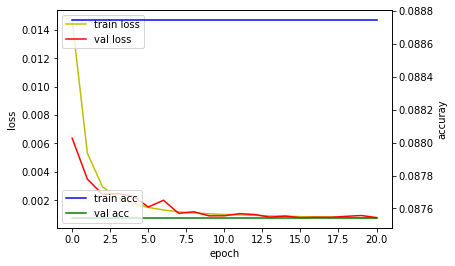

In [15]:
# loss와 accuracy 그래프
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

# plt.savefig('rnn_d')

In [16]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(7582, 1)

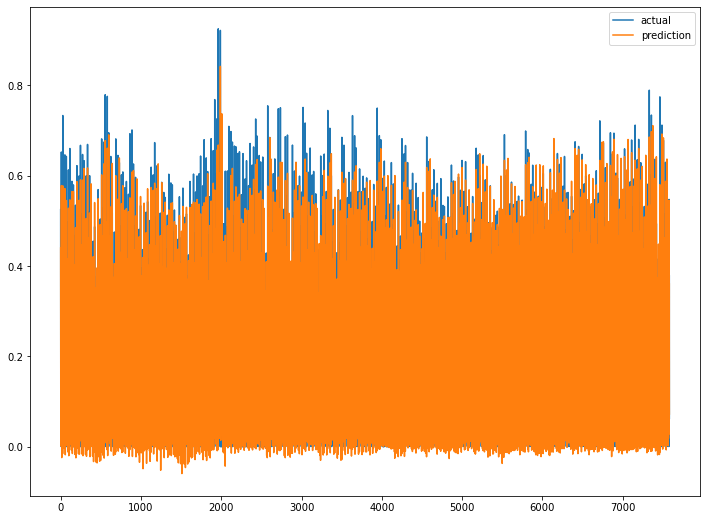

In [17]:
# 실제값과 예측값 그래프
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
# plt.savefig('rnn_p_d')()